## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_nuerons=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.Input(input_shape)
    
    for i, n_units in enumerate(num_nuerons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation='relu', 
                                   name='hidden_layer'+str(i))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation='relu', 
                                   name='hidden_layer'+str(i))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, 
                             activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

results = {}

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i in [True,False]:
    model_ckpt = ModelCheckpoint(filepath="./tmp_{}.h5".format(i),
                                 monitor="val_loss",
                                 save_best_only=i)

    model = build_mlp(x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=[x_test, y_test],
              shuffle=True,
              callbacks=[model_ckpt])
    tag_name = "Save best only: %s" % i
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    results[tag_name] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc, 
                         'valid-acc': valid_acc}



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 3s 60us/step - loss: 0.5845 - accuracy: 0.8250 - val_loss: 1.6028 - val_accuracy: 0.4904
Epoch 46/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.5669 - accuracy: 0.8325 - val_loss: 1.6207 - val_accuracy: 0.4978
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.5510 - accuracy: 0.8402 - val_loss: 1.6243 - val_accuracy: 0.4905
Epoch 48/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.5339 - accuracy: 0.8456 - val_loss: 1.6414 - val_accuracy: 0.4967
Epoch 49/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.5175 - accuracy: 0.8512 - val_loss: 1.6563 - val_accuracy: 0.4944
Epoch 50/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.5006 - accuracy: 0.8574 - val_loss: 1.6792 - val_accuracy: 0.4868
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape

50000/50000 [==============================] - 3s 62us/step - loss: 0.6713 - accuracy: 0.7941 - val_loss: 1.5621 - val_accuracy: 0.4975
Epoch 41/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.6559 - accuracy: 0.7987 - val_loss: 1.5738 - val_accuracy: 0.4894
Epoch 42/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.6368 - accuracy: 0.8072 - val_loss: 1.5808 - val_accuracy: 0.4965
Epoch 43/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.6192 - accuracy: 0.8139 - val_loss: 1.6005 - val_accuracy: 0.4877
Epoch 44/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.6037 - accuracy: 0.8191 - val_loss: 1.6016 - val_accuracy: 0.4908
Epoch 45/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.5853 - accuracy: 0.8266 - val_loss: 1.6274 - val_accuracy: 0.4886
Epoch 46/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.5689 - accuracy: 0.8321 - val_loss: 1.6330

10000/10000 [==============================] - 1s 62us/step


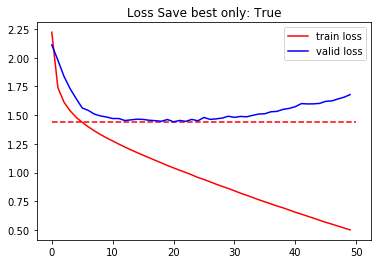

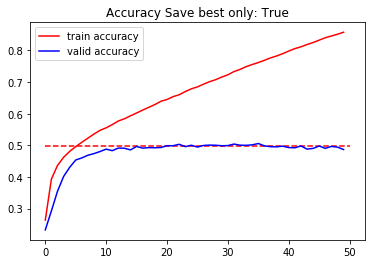

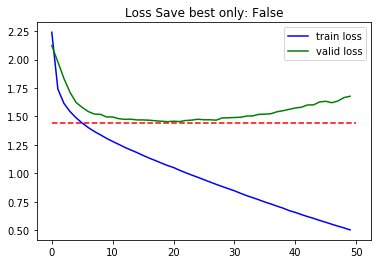

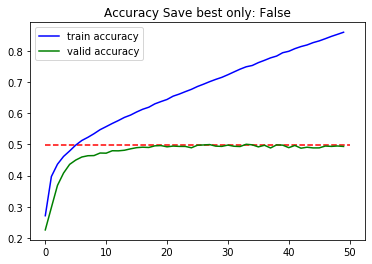

10000/10000 [==============================] - 1s 64us/step


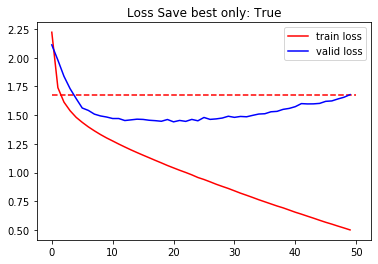

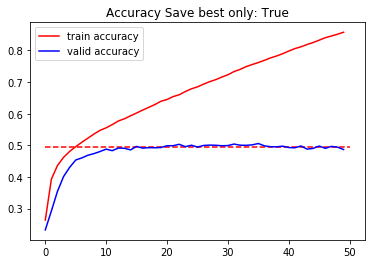

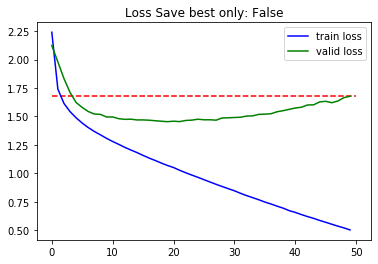

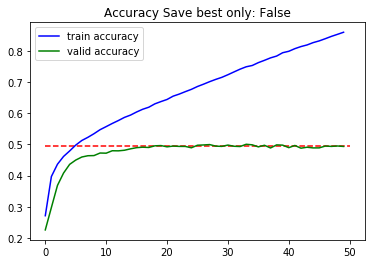

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'b', 'g', 'purple']
# Load back
for i in [True,False]:
    path = "./tmp_{}.h5".format(i)
    model = keras.models.load_model(path)
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', color=color_bar[i], label="train loss") 
        plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '-', color=color_bar[i+1], label="valid loss")
        plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
        plt.legend()
        plt.title("Loss "+ cond)
        plt.show()
        
        plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', color=color_bar[i], label="train accuracy")
        plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '-', color=color_bar[i+1], label="valid accuracy")
        plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
        plt.legend()
        plt.title("Accuracy "+ cond)
        plt.show()